In [1]:
import pandas as pd
import lightgbm as lgb
### Load dataset
ROWS = 10 ** 8
train = pd.read_csv("/export/storage_adgandhi/PBJhours_ML/Data/Intermediate/train_test_validation/training_set.csv",nrows=ROWS)
val = pd.read_csv("/export/storage_adgandhi/PBJhours_ML/Data/Intermediate/train_test_validation/validation_set.csv",nrows=ROWS/10)
test = pd.read_csv("/export/storage_adgandhi/PBJhours_ML/Data/Intermediate/train_test_validation/testing_set.csv",nrows=ROWS/10)
train

,prov_id,employee_id,job_title,pay_type,date,hours,day_of_week,hours_l1,employees_l1,hours_l2,...,employees_l29,hours_l30,employees_l30,week_perc0,week_perc1,week_perc2,week_perc3,week_perc4,week_perc5,week_perc6
0,11,3125262,3,3,13may2017,7.04,6,0.00,27.0,7.51,...,27.0,8.41,27.0,0.12,0.11,0.18,0.18,0.17,0.14,0.11
1,11,3680330,33,3,03mar2017,0.00,5,0.00,13.0,9.90,...,13.0,6.69,13.0,0.01,0.23,0.17,0.12,0.19,0.23,0.05
2,11,3680330,33,3,02mar2017,0.00,4,9.90,13.0,0.00,...,13.0,11.83,13.0,0.01,0.23,0.17,0.12,0.19,0.23,0.05
3,11,3680330,33,3,01mar2017,9.90,3,0.00,13.0,6.90,...,13.0,0.00,13.0,0.01,0.23,0.17,0.12,0.19,0.23,0.05
4,11,3680330,33,3,28feb2017,0.00,2,6.90,13.0,11.57,...,13.0,0.00,13.0,0.01,0.23,0.17,0.12,0.19,0.23,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999995,10893,9432590,3,3,09dec2020,7.60,3,7.65,32.0,7.55,...,32.0,7.60,32.0,0.15,0.13,0.18,0.15,0.13,0.13,0.15
99999996,10893,9432590,3,3,08dec2020,7.65,2,7.55,32.0,0.50,...,32.0,7.82,32.0,0.15,0.12,0.17,0.15,0.12,0.12,0.15
99999997,10893,9432590,3,3,07dec2020,7.55,1,0.50,34.0,0.50,...,34.0,7.87,34.0,0.15,0.12,0.17,0.15,0.12,0.12,0.15
99999998,10893,6711197,3,3,30mar2020,0.00,1,7.86,27.0,7.81,...,27.0,7.59,27.0,0.16,0.14,0.14,0.15,0.13,0.14,0.15


In [2]:
train.columns

Index(['prov_id', 'employee_id', 'job_title', 'pay_type', 'date', 'hours',
       'day_of_week', 'hours_l1', 'employees_l1', 'hours_l2', 'employees_l2',
       'hours_l3', 'employees_l3', 'hours_l4', 'employees_l4', 'hours_l5',
       'employees_l5', 'hours_l6', 'employees_l6', 'hours_l7', 'employees_l7',
       'hours_l8', 'employees_l8', 'hours_l9', 'employees_l9', 'hours_l10',
       'employees_l10', 'hours_l11', 'employees_l11', 'hours_l12',
       'employees_l12', 'hours_l13', 'employees_l13', 'hours_l14',
       'employees_l14', 'hours_l15', 'employees_l15', 'hours_l16',
       'employees_l16', 'hours_l17', 'employees_l17', 'hours_l18',
       'employees_l18', 'hours_l19', 'employees_l19', 'hours_l20',
       'employees_l20', 'hours_l21', 'employees_l21', 'hours_l22',
       'employees_l22', 'hours_l23', 'employees_l23', 'hours_l24',
       'employees_l24', 'hours_l25', 'employees_l25', 'hours_l26',
       'employees_l26', 'hours_l27', 'employees_l27', 'hours_l28',
       'employ

In [3]:
# %%
# ========================================
#          PREP DATAFRAMES
# ========================================

train_inputs, train_labels = train.drop(['employee_id','date','hours'], axis=1), train.filter(['hours'])
val_inputs, val_labels = val.drop(['employee_id','date','hours'], axis=1), val.filter(['hours'])


print(train_inputs)
print(train_labels)


          prov_id  job_title  pay_type  day_of_week  hours_l1  employees_l1  \
0              11          3         3            6      0.00          27.0   
1              11         33         3            5      0.00          13.0   
2              11         33         3            4      9.90          13.0   
3              11         33         3            3      0.00          13.0   
4              11         33         3            2      6.90          13.0   
...           ...        ...       ...          ...       ...           ...   
99999995    10893          3         3            3      7.65          32.0   
99999996    10893          3         3            2      7.55          32.0   
99999997    10893          3         3            1      0.50          34.0   
99999998    10893          3         3            1      7.86          27.0   
99999999    10893          3         3            0      7.81          27.0   

          hours_l2  employees_l2  hours_l3  employe

In [5]:
# %%
# ========================================
#          DATAFRAME TO LGB DS
# ========================================

cats = ['job_title', 'prov_id', 'pay_type', 'day_of_week']

train_data = lgb.Dataset(train_inputs, label=train_labels, categorical_feature=cats)
val_data = lgb.Dataset(val_inputs, label=val_labels, categorical_feature=cats)
#test_data = lgb.Dataset(test_inputs, label=test_labels, categorical_feature=cats)
print(train_data)

In [6]:
# %%
# ========================================
#            TRAIN WITH LGB
# ========================================
param = {
   'num_leaves': 200,
   'learning_rate': 0.05,
   'metric': 'mse',
   'boosting': 'gbdt',
}
evals_result = {}
bst = lgb.train(param, train_data, valid_sets=[val_data], evals_result=evals_result, early_stopping_rounds=5)

/users/facsupport/asharma/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.671011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16888
[LightGBM] [Info] Number of data points in the train set: 100000000, number of used features: 71


/users/facsupport/asharma/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/users/facsupport/asharma/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 4.696139
[1]	valid_0's l2: 18.7991
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 18.044
[3]	valid_0's l2: 17.357
[4]	valid_0's l2: 16.7419
[5]	valid_0's l2: 16.1785
[6]	valid_0's l2: 15.6768
[7]	valid_0's l2: 15.2134
[8]	valid_0's l2: 14.7939
[9]	valid_0's l2: 14.413
[10]	valid_0's l2: 14.0769
[11]	valid_0's l2: 13.7686
[12]	valid_0's l2: 13.4838
[13]	valid_0's l2: 13.2241
[14]	valid_0's l2: 12.9874
[15]	valid_0's l2: 12.7638
[16]	valid_0's l2: 12.559
[17]	valid_0's l2: 12.3846
[18]	valid_0's l2: 12.211
[19]	valid_0's l2: 12.0486
[20]	valid_0's l2: 11.9022
[21]	valid_0's l2: 11.7645
[22]	valid_0's l2: 11.6406
[23]	valid_0's l2: 11.5278
[24]	valid_0's l2: 11.4286
[25]	valid_0's l2: 11.3256
[26]	valid_0's l2: 11.2308
[27]	valid_0's l2: 11.1446
[28]	valid_0's l2: 11.0662
[29]	valid_0's l2: 10.9956
[30]	valid_0's l2: 10.9378
[31]	valid_0's l2: 10.8753
[32]	valid_0's l2: 10.821
[33]	valid_0's l2: 10.7684
[34]	valid_

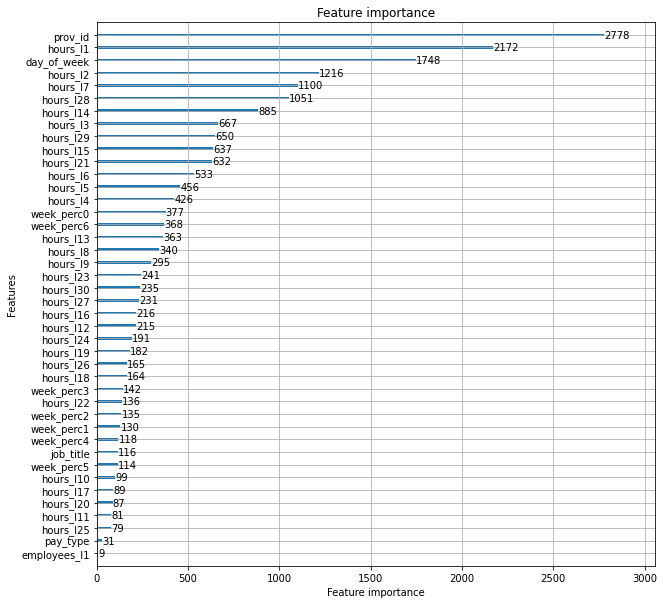

In [7]:
# %%
# =========================================
#          LGB Influence Scores
# =========================================

axes = lgb.plot_importance(bst,figsize=(10,10))

In [8]:
pd.unique(df['prov_id'])

NameError: name 'df' is not defined

In [ ]:
test_inputs, test_labels = test.drop(['employee_id','date','hours'], axis=1), test.filter(['hours'])
predictions = bst.predict(test_inputs)
MAE=0
RMSE = 0

for i in range(len(test_labels)):
    prediction = predictions[i]
    value = test_labels.iloc[i]['hours']
    print(f"Prediction: {prediction} True Value: {value}")
    MAE += abs(prediction-value)
    RMSE += (prediction-value)**2
    
print(f"Mean absolute error {MAE/len(test_labels)}")
print(f"Root mean squared error {(RMSE/len(test_labels))**0.5}")

In [ ]:
print(f"Mean absolute error {errorSum/len(test_labels)}")
print(f"Root mean squared error {(RMSE/len(test_labels))**0.5}")